## <span style="color:black">Hodgkin and Huxley Model</span>

Last week you implemented the Integrate and Fire model, but it wasn't very realistic because you had to define the spikes by hand.

This week, you will be implementing the Hodgkin and Huxley model which represents more realistic constraints on the firing of a neuron like ion-gates.

#### Use the following equations in your Hodgkin and Huxley neuron model:

\begin{equation*}
\alpha_n(V_m) = \frac{0.01(V_m + 55)}{1 - e^{(-.1(V_m+55))}}
\end{equation*}

\begin{equation*}
\beta_n(V_m) = 0.125e^{(-.01125(V_m+55))}
\end{equation*}

\begin{equation*}
\alpha_m(V_m) = \frac{0.1(V_m + 40)}{1 - e^{(-.1(V_m+40))}}
\end{equation*}

\begin{equation*}
\beta_m(V_m) = 4e^{(-.05556(V_m+65))}
\end{equation*}

\begin{equation*}
\alpha_h(V_m) = 0.07e^{(-.05(V_m+65))}
\end{equation*}

\begin{equation*}
\beta_h(V_m) = \frac{1}{1 + e^{(-.1(V_m+35))}}
\end{equation*}

\begin{equation*}
\tau_p(V_m) = \frac{1}{\alpha_p(V_m) + \beta_p(V_m)}
\end{equation*}

\begin{equation*}
\tau_V(V_m) = \frac{c_m}{g_L + g_Kn^4 + g_{Na}m^3h}
\end{equation*}

\begin{equation*}
p_{\infty} = \frac{\alpha_p(V_m)}{\alpha_p(V_m) + \beta_p(V_m)}
\end{equation*}

\begin{equation*}
V_{\infty} = \frac{g_LE_L + g_Kn^4E_K + g_{Na}m^3hE_{na} + \frac{I}{A}}{g_L + g_Kn^4 + g_{Na}m^3h}
\end{equation*}

\begin{equation*}
p(t + \Delta t) = p_{\infty} + (p - p_{\infty})e^{\frac{-\Delta t}{\tau_p}}
\end{equation*}

Where *p* stands in for m, n, and h. In other words, the *p* equations will be used for each.

#### The following constants and initial conditions may be used:

\begin{equation*}
\frac{I_e}{A} = 200nA/{mm}^2
\end{equation*}

\begin{equation*}
c_m = 10nF/{mm}^2
\end{equation*}

\begin{equation*}
g_L = 0.003e3 mS/{mm}^2
\end{equation*}

\begin{equation*}
g_K = 0.36e3 mS/{mm}^2
\end{equation*}

\begin{equation*}
g_{Na} = 1.2e3 mS/{mm}^2
\end{equation*}

\begin{equation*}
E_L = -54.387mV
\end{equation*}

\begin{equation*}
E_K = -77mV
\end{equation*}

\begin{equation*}
E_{Na} = 50mV
\end{equation*}

\begin{equation*}
V = -65mV
\end{equation*}

\begin{equation*}
m = 0.0529 
\end{equation*}

\begin{equation*}
h = 0.5961
\end{equation*}

\begin{equation*}
n = 0.3177
\end{equation*}

     **NOTE: m,n,h are the steady-state values at the resting potential**
                    


Use the starter code below to build a simulation of a Hodgkin-Huxley neuron. Your simulation must plot V, m, n, and h over time in separate subplots. Your simulation will include the neuron's response to a constant current injection $I_e$. Your experimental run will last for $1000 ms$. Your $I_e$ will turn on at $250 ms$ and off at $750 ms$. You should use an integration time step of $0.1 ms$. Your initial voltage will be the neuron's resting potential (-65 mV). Make sure that your figure is titled appropriately and includes informative axis lables that include units.

Text(0.5, 0, 'Time in ms')

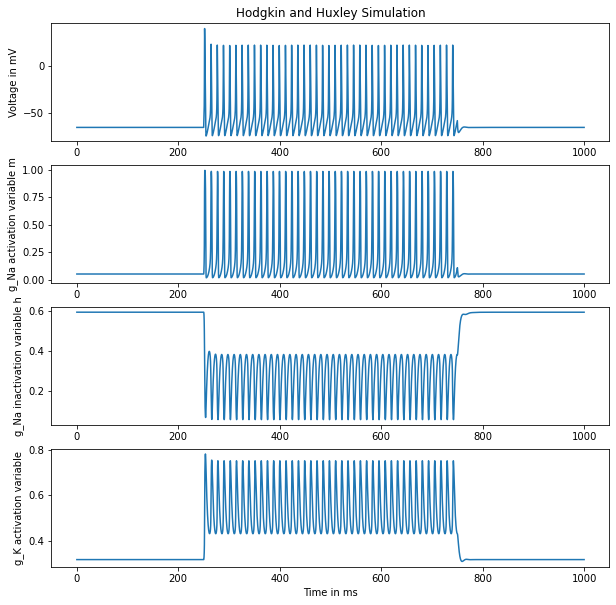

In [2]:
# Import helpful packages
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
dt          =  0.1      # time step (ms)
tFinal      =  1000     # total time of run (ms)
tStimStart  =  250      # time to start injecting current (ms)
tStimEnd    =  750      # time to end injecting current (ms)
c           =  10       # capacitance per unit area (nF/mm^2)
gMaxL       =  3        # leak maximal conductance per unit area (mS/mm^2)
EL          =  -54.387  # leak conductance reversal potential (mV)
gMaxK       =  360      # maximal K conductance per unit area (mS/mm^2)
EK          =  -77      # K conductance reversal potential (mV)
gMaxNa      =  1200     # maximal Na conductance per unit area (mS/mm^2)
ENa         =  50       # Na conductance reversal potential (mV)

# set up data structures to hold relevant variable vectors
timeVec = np.arange(0, tFinal, dt)
voltageVec = np.zeros(len(timeVec))
Ivector = np.zeros(len(timeVec))
mVec = np.zeros(len(timeVec))
hVec = np.zeros(len(timeVec))
nVec = np.zeros(len(timeVec))

# assign the initial value of each variable
voltageVec[0] = -65 # mV
Ie =  200 # nA/mm^2
mVec[0] = 0.0529
hVec[0] = 0.5961
nVec[0] = 0.3177

# define the stimulus
Ivector[int(tStimStart/dt) : int(tStimEnd/dt) ] = Ie 

# For-loop to integrate equations into model
for i in range(len(timeVec)-1):
    # Calculate alpha values for m, h, and n
    alpha_n = (.01 * (voltageVec[i]+55)) / (1 - np.exp(-.1 * (voltageVec[i]+55)))
    alpha_m = (0.1 * (voltageVec[i]+40)) / (1 - np.exp(-.1 * (voltageVec[i]+40)))
    alpha_h = 0.07 * np.exp(-.05 * (voltageVec[i]+65))
    
    # Calculate beta values for m, h, and n
    beta_n = 0.125 * np.exp(-0.0125 * (voltageVec[i]+65))
    beta_m = 4 * np.exp(-0.0556 * (voltageVec[i]+65))
    beta_h = 1 / (1 + np.exp(-.1 * (voltageVec[i]+35)))
    
    # Calculate tau values for m, h, and n
    tau_n = 1 / (alpha_n + beta_n)
    tau_m = 1 / (alpha_m + beta_m)
    tau_h = 1 / (alpha_h + beta_h)
    
    # Calculate inf values for m, h, and n
    nInf = alpha_n / (alpha_n + beta_n)
    mInf = alpha_m / (alpha_m + beta_m)
    hInf = alpha_h / (alpha_h + beta_h)
    
    # Calculate and store values in m, h, and n vectors
    mVec[i+1] = mInf + (mVec[i]-mInf)*np.exp(-dt/tau_m)
    nVec[i+1] = nInf + (nVec[i]-nInf)*np.exp(-dt/tau_n)
    hVec[i+1] = hInf + (hVec[i]-hInf)*np.exp(-dt/tau_h)
    
    # Calculate and store values in the tau voltage vector
    denominator = gMaxL + gMaxK*nVec[i]**4 + gMaxNa*(mVec[i]**3)*hVec[i]
    vInf = (gMaxL*EL + gMaxK*(nVec[i]**4)*EK + gMaxNa*(mVec[i]**3)*hVec[i]*ENa + Ivector[i]) / denominator
    tau_V = c / denominator
    voltageVec[i+1] = vInf + (voltageVec[i]-vInf)*np.exp(-dt/tau_V)


# Plotting
plt.figure(1, figsize=(10,10))
plt.subplot(4,1,1)
plt.plot(timeVec,voltageVec)
plt.title('Hodgkin and Huxley Simulation')
plt.ylabel('Voltage in mV')
plt.subplot(4,1,2)
plt.plot(timeVec, mVec)
plt.ylabel('g_Na activation variable m')
plt.subplot(4,1,3)
plt.plot(timeVec, hVec)
plt.ylabel('g_Na inactivation variable h')
plt.subplot(4,1,4)
plt.plot(timeVec, nVec)
plt.ylabel('g_K activation variable')
plt.xlabel('Time in ms')

This is cool, but in order to get more insight, let's examine a single trace. Copy your code below and decrease dt to 0.002 and examine a 20 ms simulation where Ie starts at t=0. Examine the traces for m, h, and n. As comments below, describe how each of these variables gives rise to the qualitative stages of the action potential that we talked about in class.

In [ ]:
# your code here

In [ ]:
# answer:

For the integrate and fire model, you created a nested loop where you tested six different levels of external stimulation and computed the model neuron's firing rate for each. Let's do the same thing for your Hodgkin and Huxley neuron.

Add to your simulation the ability to calculate the average firing rate over the 500 ms of stimulation. In an outer loop, simulate six different pulse strengths between $65$ and $1000 nA/{mm^2}$. Create a plot of average firing rate (in spikes/second) versus pulse strength. 

Hint: Use **_scipy.signal's_** function [***find_peaks***](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) to calculate the number of spikes in your voltage vec.

In [ ]:
# Import find_peaks function from scipy.signal to calculate the number of spikes
from scipy.signal import find_peaks

# Define model parameters
dt          =  # time step (ms)
tFinal      =  # total time of run (ms)
tStimStart  =  # time to start injecting current (ms)
tStimEnd    =  # time to end injecting current (ms)
c           =  # capacitance per unit area (nF/mm^2)
gMaxL       =  # leak maximal conductance per unit area (mS/mm^2)
EL          =  # leak conductance reversal potential (mV)
gMaxK       =  # maximal K conductance per unit area (mS/mm^2)
EK          =  # K conductance reversal potential (mV)
gMaxNa      =  # maximal Na conductance per unit area (mS/mm^2)
ENa         =  # Na conductance reversal potential (mV)

# set up data structures to hold relevant variable vectors
timeVec = np.arange()
impulseVec = np.arange() # put your levels of external current here
rateVec = np.zeros()

# For-loop to loop through different levels of stimulation
for j in range():
    # reset voltage vector
    
    # define the stimulus
    
    # set initial conditions for voltage and gating variables
    
    # Simulation loop
    for i in range():
        # Calculate alpha values for m, h, and n
    
        # Calculate beta values for m, h, and n
    
        # Calculate tau values for m, h, and n
    
        # Calculate inf values for m, h, and n
    
        # Calculate and store values in m, h, and n vectors
    
        # Update Vinf and tauV
    
        # Calculate and store next voltage value in vector
    
    # use find_peaks to count the number of action potentials
    peaks,_ = find_peaks()
    
    # compute and store the average firing rate 
    rateVec[] = 
    
plt.figure(2, figsize=(6,4))
plt.plot(rateVec, impulseVec)
plt.title('Impulse vs Rate')
plt.xlabel('Impulse in nA/mm^2')
plt.ylabel('Rate in spikes/second')


Examine the graph from the previous problem. What can you conclude about the way that neurons communicate? (4 sentences max)

The m, n, and h variables do not neatly correspond to Na+, K+, or leak channels. Using your code from the first simulation, alter the plot to show the total activation of the Na+ and K+ channels in the first 20 ms.

Hint: let's say an alien Na+ channel is fit by the equation $m^4h^2$. This would correspond to the total Na+ activation.

As you did in in the first simulation, interpret the graph of Na+ and K+ activation over time that you have just made. Which graph is easier to interpret? Why?

Tetrodotoxin (TTX), the puffer fish toxin, selectively blocks voltage-gated Na+ channels. In the cell below, alter your original code to simulate the addition of TTX at 400 ms, and plot V, m, n, and h.

Describe what happened during your simulation. Can the neuron fire an action potential after TTX has been introduced? Why or why not?

Nice job! Please submit this on Lyceum for grading!